In [1]:
import pandas as pd
import savReaderWriter as spss
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.plotly as py
import plotly as plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


file_name = "StudentsPerformance.csv"
df = pd.read_csv(file_name)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


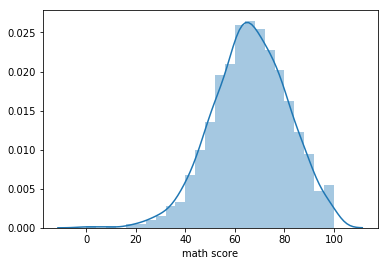

In [4]:
# Continuous variable
ax = sns.distplot(df["math score"])

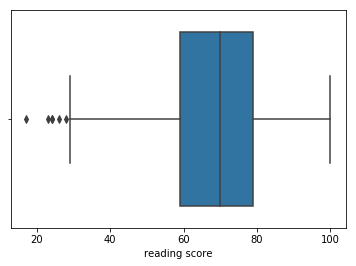

In [5]:
# Continuous variable
ax = sns.boxplot(x="reading score", data=df)

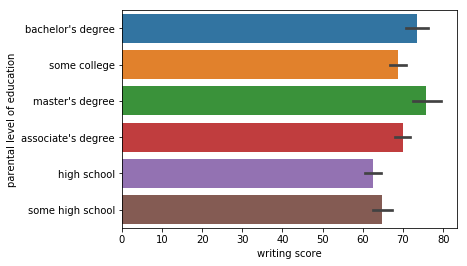

In [7]:
# Continuous variable
ax = sns.barplot(x=df['writing score'], y=df['parental level of education'])


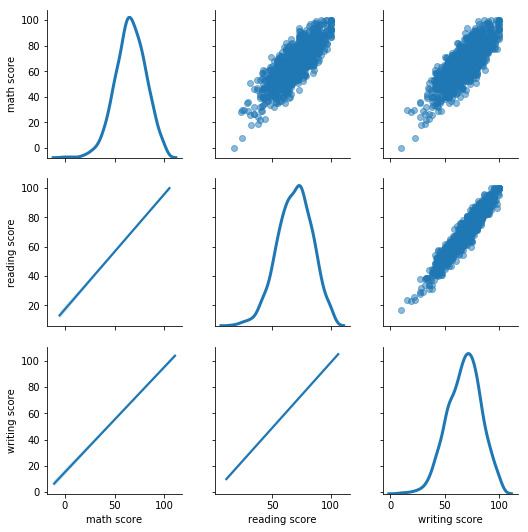

In [26]:
g = sns.PairGrid(df.dropna(), diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


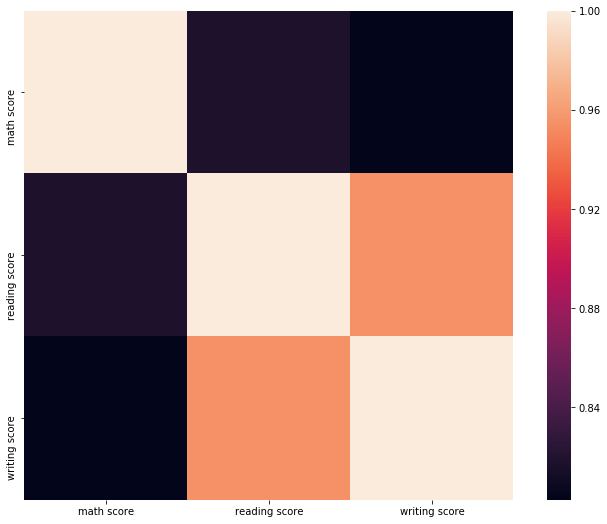

In [14]:
# Bivariate for continuous variables

corrmat = df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=1, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.


In [22]:
# Features; indicator if parents are college educated
features = pd.get_dummies(df['parental level of education'])

features['college educated'] = np.where((df['parental level of education'].isin(['bachelor\'s degree','master\'s degree', 'associate\'s degree'])), 1, 0)

print(pd.crosstab(features['college educated'], df['parental level of education']))

parental level of education  associate's degree  bachelor's degree  \
college educated                                                     
0                                             0                  0   
1                                           222                118   

parental level of education  high school  master's degree  some college  \
college educated                                                          
0                                    196                0           226   
1                                      0               59             0   

parental level of education  some high school  
college educated                               
0                                         179  
1                                           0  


In [23]:
# Features; compares students that have passing math scores to non-passing ones

features['math passing'] = np.where(df['math score'] >= 75, 1, 0)

print(df['math score'].groupby(features['math passing']).describe())

              count       mean        std   min   25%   50%   75%    max
math passing                                                            
0             705.0  58.777305  11.224595   0.0  52.0  61.0  67.0   74.0
1             295.0  83.562712   6.707846  75.0  78.0  82.0  88.0  100.0


In [24]:
# Features; compares students that have passing reading scores to non-passing ones

features['reading passing'] = np.where(df['reading score'] >= 75, 1, 0)

print(df['reading score'].groupby(features['reading passing']).describe())

                 count       mean        std   min   25%   50%    75%    max
reading passing                                                             
0                630.0  60.501587  10.379561  17.0  54.0  62.0  68.75   74.0
1                370.0  83.927027   6.841811  75.0  78.0  83.0  88.00  100.0


In [25]:
# Features; compares students that have passing writing scores to non-passing ones

features['writing passing'] = np.where(df['writing score'] >= 75, 1, 0)

print(df['writing score'].groupby(features['writing passing']).describe())

                 count       mean        std   min   25%   50%   75%    max
writing passing                                                            
0                650.0  59.567692  11.119572  10.0  53.0  62.0  68.0   74.0
1                350.0  83.814286   6.914320  75.0  78.0  82.0  88.0  100.0
